In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')

In [3]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import viz

## Adding in-distribution data

Text(0.5, 1.0, 'ASR at the last epoch')

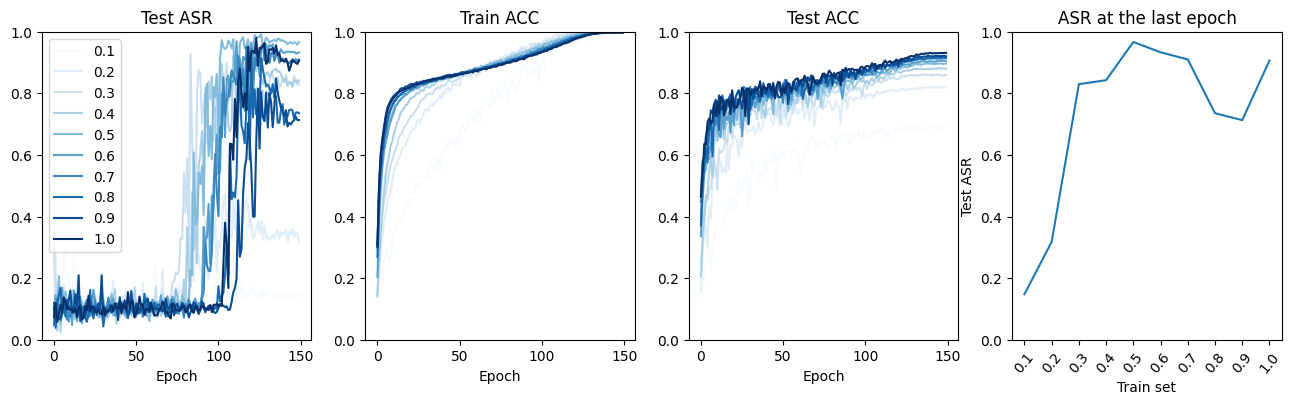

In [22]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# train_sizes = [0.1, 0.2, 0.3, 1.0]
# train_sizes = [0.1, 0.4, 0.7]
norm_sizes = (train_sizes - np.min(train_sizes)) / (np.max(train_sizes) - np.min(train_sizes))
cmap = plt.get_cmap('Blues')
colors = cmap(norm_sizes)
asrs = {}
for i, train_size in enumerate(train_sizes):
    # d = torch.load(f"outputs/BADNET/resnet18_sgd/resnet18_sgd_150_0.01_{train_size}.pt")
    # d = torch.load(f"outputs/SIG/resnet18_sgd/resnet18_sgd_150_0.001_{train_size}.pt")
    # d = torch.load(f"outputs/BADNET/resnet18_sgd/resnet18_sgd_150_0.005_{train_size}.pt")
    d = torch.load(f"outputs/BADNET/resnet18_sgd/resnet18_sgd_150_0.005_{train_size}_90.pt")
    # d = torch.load(f"outputs/BADNET/resnet18_sgd/no_aug/resnet18_sgd_150_0.005_{train_size}_43.pt")
    # d = torch.load(f"outputs/BADNET/resnet18_sgd/resnet18_sgd_150_0.01_{train_size}.pt")

    args = d['args']
    # print(len(args['trainset_kept_indices']))
    # print(len(args['train_poison_indices']))
    # for j in args['train_poison_indices']:
    #     assert j in args['trainset_kept_indices']
    df = pd.DataFrame(data=d['stats'])
    asrs[train_size] = df['test_asr'].values[-1]

    axes[0].plot(df.test_asr, label=f"{train_size:0.1f}", color=colors[i])
    axes[1].plot(df.train_acc, label=f"{train_size:0.1f}", color=colors[i])
    axes[2].plot(df.test_clean_acc, label=f"{train_size:0.1f}", color=colors[i])

    axes[0].set_ylim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.0])
    axes[2].set_ylim([0.0, 1.0])

    axes[0].set_xlabel("Epoch")
    axes[1].set_xlabel("Epoch")
    axes[2].set_xlabel("Epoch")

    axes[0].set_title("Test ASR")
    axes[1].set_title("Train ACC")
    axes[2].set_title("Test ACC")
axes[0].legend()

axes[3].plot(range(len(asrs)), asrs.values())
axes[3].set_xticks(range(len(asrs)), asrs.keys(), rotation=50)
axes[3].set_ylabel("Test ASR")
axes[3].set_xlabel("Train set")
axes[3].set_ylim([0., 1.0])
axes[3].set_title("ASR at the last epoch")

In [44]:
fig.savefig("figs/badnetid_asr_poi250.pdf", dpi=200, bbox_inches='tight')

Text(0.5, 1.0, 'ASR at the last epoch')

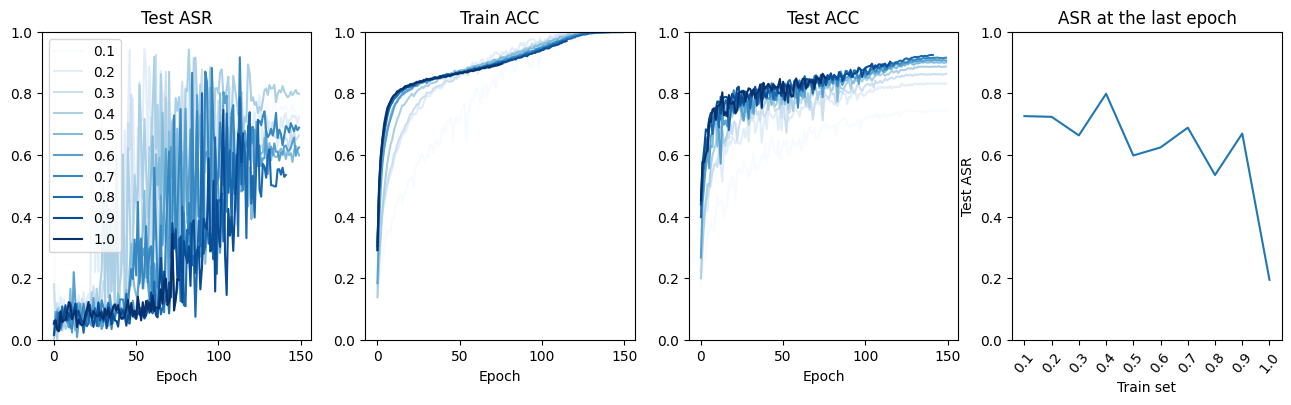

In [6]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# train_sizes = [0.1, 0.2, 0.3, 1.0]
# train_sizes = [0.1, 0.4, 0.7]
norm_sizes = (train_sizes - np.min(train_sizes)) / (np.max(train_sizes) - np.min(train_sizes))
cmap = plt.get_cmap('Blues')
colors = cmap(norm_sizes)
asrs = {}
for i, train_size in enumerate(train_sizes):
    # d = torch.load(f"outputs/BADNET/resnet18_sgd/resnet18_sgd_150_0.01_{train_size}.pt")
    # d = torch.load(f"outputs/SIG/resnet18_sgd/resnet18_sgd_150_0.001_{train_size}.pt")
    d = torch.load(f"outputs/SIG/resnet18_sgd/resnet18_sgd_150_0.001_{train_size}_90.pt")
    # d = torch.load(f"outputs/BADNET/resnet18_sgd/resnet18_sgd_150_0.005_{train_size}.pt")
    # d = torch.load(f"outputs/BADNET/resnet18_sgd/resnet18_sgd_150_0.01_{train_size}.pt")

    args = d['args']
    # print(len(args['trainset_kept_indices']))
    # print(len(args['train_poison_indices']))
    # for j in args['train_poison_indices']:
    #     assert j in args['trainset_kept_indices']
    df = pd.DataFrame(data=d['stats'])
    asrs[train_size] = df['test_asr'].values[-1]

    axes[0].plot(df.test_asr, label=f"{train_size:0.1f}", color=colors[i])
    axes[1].plot(df.train_acc, label=f"{train_size:0.1f}", color=colors[i])
    axes[2].plot(df.test_clean_acc, label=f"{train_size:0.1f}", color=colors[i])

    axes[0].set_ylim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.0])
    axes[2].set_ylim([0.0, 1.0])

    axes[0].set_xlabel("Epoch")
    axes[1].set_xlabel("Epoch")
    axes[2].set_xlabel("Epoch")

    axes[0].set_title("Test ASR")
    axes[1].set_title("Train ACC")
    axes[2].set_title("Test ACC")
axes[0].legend()

axes[3].plot(range(len(asrs)), asrs.values())
axes[3].set_xticks(range(len(asrs)), asrs.keys(), rotation=50)
axes[3].set_ylabel("Test ASR")
axes[3].set_xlabel("Train set")
axes[3].set_ylim([0., 1.0])
axes[3].set_title("ASR at the last epoch")

In [39]:
fig.savefig("figs/sigid_asr_poi50.pdf", dpi=200, bbox_inches='tight')

In [36]:
d = torch.load(f"outputs/WANET/resnet18_sgd/resnet18_sgd_150_0.05_1.0_43.pt")

Text(0.5, 1.0, 'ASR at the last epoch')

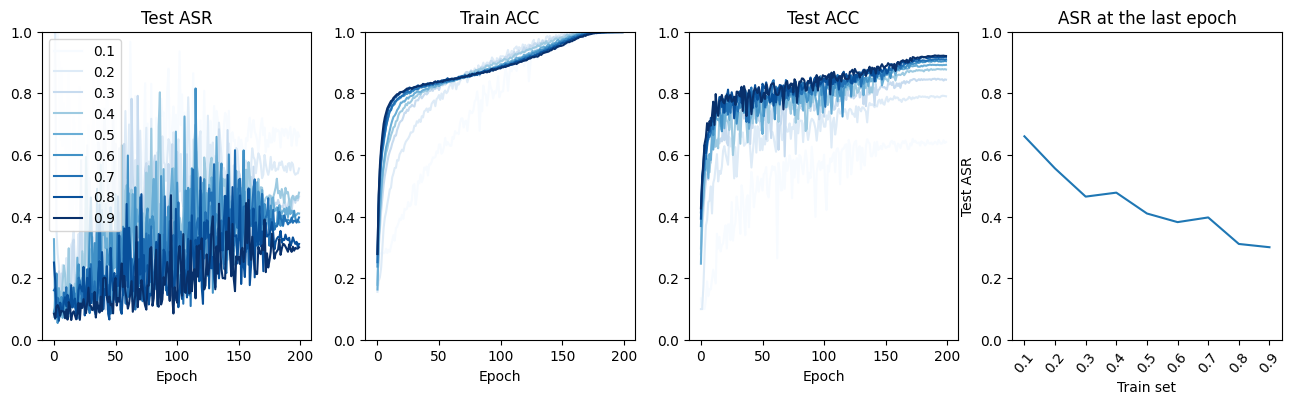

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
# train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# train_sizes = [0.1, 0.2, 0.3, 1.0]
# train_sizes = [0.1, 0.4, 0.7]
norm_sizes = (train_sizes - np.min(train_sizes)) / (np.max(train_sizes) - np.min(train_sizes))
cmap = plt.get_cmap('Blues')
colors = cmap(norm_sizes)
asrs = {}
for i, train_size in enumerate(train_sizes):
    # d = torch.load(f"outputs/BADNET/resnet18_sgd/resnet18_sgd_150_0.01_{train_size}.pt")
    # d = torch.load(f"outputs/SIG/resnet18_sgd/resnet18_sgd_150_0.001_{train_size}.pt")
    # d = torch.load(f"outputs/BADNET/resnet18_sgd/resnet18_sgd_150_0.005_{train_size}.pt")
    # d = torch.load(f"outputs/BADNET/resnet18_sgd/resnet18_sgd_150_0.005_{train_size}_90.pt")
    # d = torch.load(f"outputs/WANET/resnet18_sgd/resnet18_sgd_150_0.01_{train_size}_43.pt")
    d = torch.load(f"outputs/WANET/resnet18_sgd/resnet18_sgd_200_0.02_{train_size}_43.pt")
    # d = torch.load(f"outputs/BADNET/resnet18_sgd/resnet18_sgd_150_0.01_{train_size}.pt")

    args = d['args']
    # print(len(args['trainset_kept_indices']))
    # print(len(args['train_poison_indices']))
    # for j in args['train_poison_indices']:
    #     assert j in args['trainset_kept_indices']
    df = pd.DataFrame(data=d['stats'])
    asrs[train_size] = df['test_asr'].values[-1]

    axes[0].plot(df.test_asr, label=f"{train_size:0.1f}", color=colors[i])
    axes[1].plot(df.train_acc, label=f"{train_size:0.1f}", color=colors[i])
    axes[2].plot(df.test_clean_acc, label=f"{train_size:0.1f}", color=colors[i])

    axes[0].set_ylim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.0])
    axes[2].set_ylim([0.0, 1.0])

    axes[0].set_xlabel("Epoch")
    axes[1].set_xlabel("Epoch")
    axes[2].set_xlabel("Epoch")

    axes[0].set_title("Test ASR")
    axes[1].set_title("Train ACC")
    axes[2].set_title("Test ACC")
axes[0].legend()

axes[3].plot(range(len(asrs)), asrs.values())
axes[3].set_xticks(range(len(asrs)), asrs.keys(), rotation=50)
axes[3].set_ylabel("Test ASR")
axes[3].set_xlabel("Train set")
axes[3].set_ylim([0., 1.0])
axes[3].set_title("ASR at the last epoch")

In [5]:
fig.savefig("figs/wanetid_asr_poi1000.pdf", dpi=200, bbox_inches='tight')

## Adding OOD data

Text(0.5, 1.0, 'ASR at the last epoch')

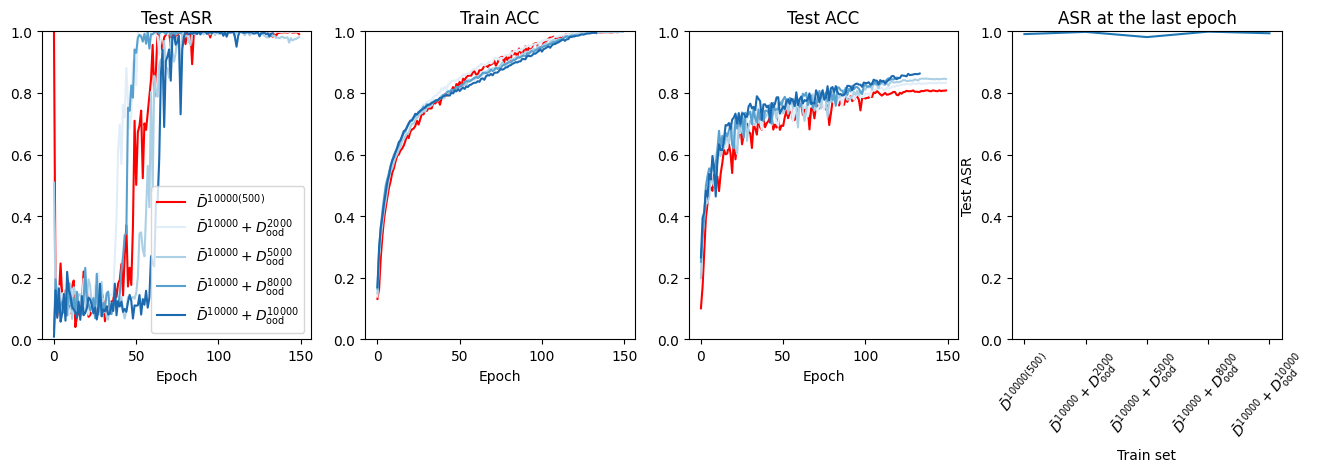

In [40]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
# train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# train_sizes = [0.2, 0.3, 0.4, 0.6, 0.7]
# train_sizes = [0.1, 0.5, 1.0]
color_sizes = np.array(range(10))
norm_sizes = (color_sizes - np.min(color_sizes)) / (np.max(color_sizes) - np.min(color_sizes))
cmap = plt.get_cmap('Blues')
add_data_colors = cmap(norm_sizes)
colors = [
    "red",
    # "green",
    # "blue"
    add_data_colors[1],
    add_data_colors[3],
    add_data_colors[5],
    add_data_colors[7],
]

paths = {
    r"$\bar D^{10000(500)}$": "outputs/BADNET/resnet18_sgd/resnet18_sgd_150_0.01_0.2.pt",
    r"$\bar D^{10000} + D_{\text{ood}}^{2000}$": "outputs/BADNET-ood/cifar10_2_0.2/resnet18_sgd/resnet18_sgd_150_0.01_0.2.pt",
    r"$\bar D^{10000} + D_{\text{ood}}^{5000}$": "outputs/BADNET-ood/cifar10_2_0.5/resnet18_sgd/resnet18_sgd_150_0.01_0.2.pt",
    r"$\bar D^{10000} + D_{\text{ood}}^{8000}$": "outputs/BADNET-ood/cifar10_2_0.8/resnet18_sgd/resnet18_sgd_150_0.01_0.2.bk.pt",
    r"$\bar D^{10000} + D_{\text{ood}}^{10000}$": "outputs/BADNET-ood/cifar10_2_1.0/resnet18_sgd/resnet18_sgd_150_0.01_0.2.bk.pt",
}

asrs = {}

for i, (k, p) in enumerate(paths.items()):
    d = torch.load(p)
    args = d['args']
    # print(len(args['trainset_kept_indices']))
    # print(len(args['train_poison_indices']))
    # for j in args['train_poison_indices']:
    #     assert j in args['trainset_kept_indices']
    df = pd.DataFrame(data=d['stats'])
    asrs[k] = df['test_asr'].values[-1]

    axes[0].plot(df.test_asr, label=k, color=colors[i])
    axes[1].plot(df.train_acc, label=k, color=colors[i])
    axes[2].plot(df.test_clean_acc, label=k, color=colors[i])

    axes[0].set_ylim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.0])
    axes[2].set_ylim([0.0, 1.0])
    
    axes[0].set_xlabel("Epoch")
    axes[1].set_xlabel("Epoch")
    axes[2].set_xlabel("Epoch")

    axes[0].set_title("Test ASR")
    axes[1].set_title("Train ACC")
    axes[2].set_title("Test ACC")
axes[0].legend()

axes[3].plot(range(len(asrs)), asrs.values())
axes[3].set_xticks(range(len(asrs)), asrs.keys(), rotation=50)
axes[3].set_ylabel("Test ASR")
axes[3].set_xlabel("Train set")
axes[3].set_ylim([0., 1.0])
axes[3].set_title("ASR at the last epoch")

In [41]:
fig.savefig("figs/badnetood_cifar10_2_asr.pdf", dpi=200, bbox_inches='tight')

Text(0.5, 1.0, 'ASR at the last epoch')

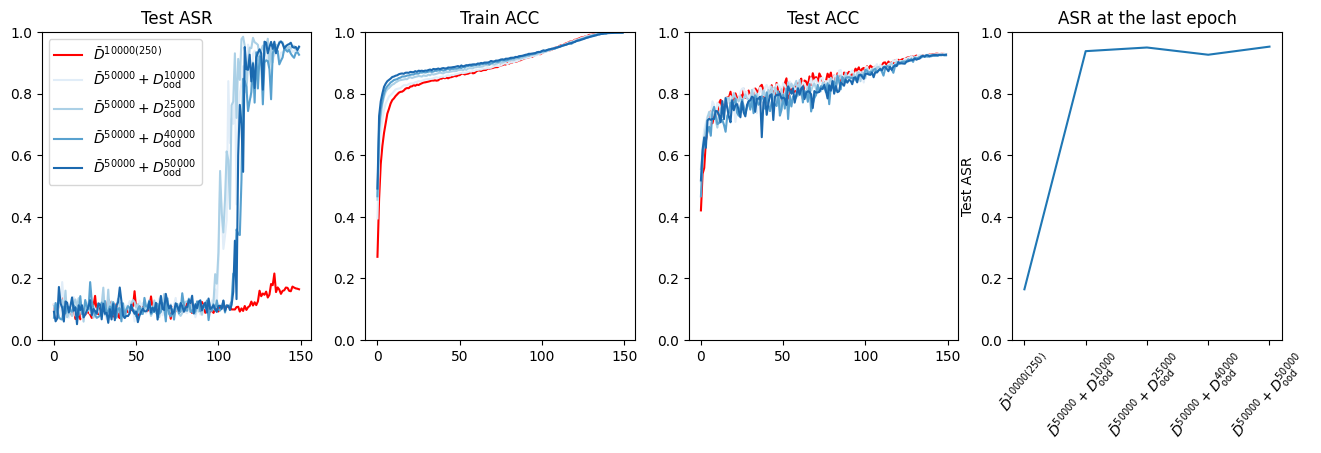

In [35]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
# train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# train_sizes = [0.2, 0.3, 0.4, 0.6, 0.7]
# train_sizes = [0.1, 0.5, 1.0]
color_sizes = np.array(range(10))
norm_sizes = (color_sizes - np.min(color_sizes)) / (np.max(color_sizes) - np.min(color_sizes))
cmap = plt.get_cmap('Blues')
add_data_colors = cmap(norm_sizes)
colors = [
    "red",
    # "green",
    # "blue"
    add_data_colors[1],
    add_data_colors[3],
    add_data_colors[5],
    add_data_colors[7],
]

paths = {
    r"$\bar D^{10000(250)}$": "outputs/BADNET/resnet18_sgd/resnet18_sgd_150_0.005_1.0.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{10000}$": "outputs/BADNET-ood/fake-cifar10_0.2/resnet18_sgd/resnet18_sgd_150_0.005_1.0.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{25000}$": "outputs/BADNET-ood/fake-cifar10_0.5/resnet18_sgd/resnet18_sgd_150_0.005_1.0.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{40000}$": "outputs/BADNET-ood/fake-cifar10_0.8/resnet18_sgd/resnet18_sgd_150_0.005_1.0.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{50000}$": "outputs/BADNET-ood/fake-cifar10_1.0/resnet18_sgd/resnet18_sgd_150_0.005_1.0.pt",
}

asrs = {}

for i, (k, p) in enumerate(paths.items()):
    d = torch.load(p)
    args = d['args']
    # print(len(args['trainset_kept_indices']))
    # print(len(args['train_poison_indices']))
    # for j in args['train_poison_indices']:
    #     assert j in args['trainset_kept_indices']
    df = pd.DataFrame(data=d['stats'])
    asrs[k] = df['test_asr'].values[-1]

    axes[0].plot(df.test_asr, label=k, color=colors[i])
    axes[1].plot(df.train_acc, label=k, color=colors[i])
    axes[2].plot(df.test_clean_acc, label=k, color=colors[i])

    axes[0].set_ylim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.0])
    axes[2].set_ylim([0.0, 1.0])

    axes[0].set_title("Test ASR")
    axes[1].set_title("Train ACC")
    axes[2].set_title("Test ACC")
axes[0].legend()

axes[3].plot(range(len(asrs)), asrs.values())
axes[3].set_xticks(range(len(asrs)), asrs.keys(), rotation=50)
axes[3].set_ylabel("Test ASR")
axes[3].set_ylim([0., 1.0])
axes[3].set_title("ASR at the last epoch")

In [36]:
fig.savefig("figs/badnetood_fakecifar10_asr.pdf", dpi=200, bbox_inches='tight')

Text(0.5, 1.0, 'ASR at the last epoch')

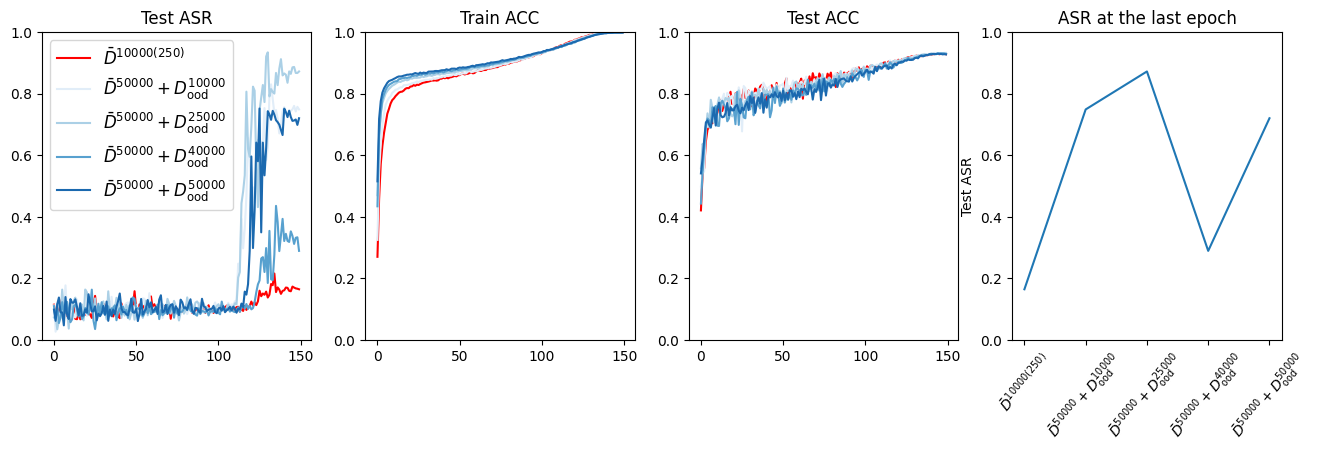

In [33]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
# train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# train_sizes = [0.2, 0.3, 0.4, 0.6, 0.7]
# train_sizes = [0.1, 0.5, 1.0]
color_sizes = np.array(range(10))
norm_sizes = (color_sizes - np.min(color_sizes)) / (np.max(color_sizes) - np.min(color_sizes))
cmap = plt.get_cmap('Blues')
add_data_colors = cmap(norm_sizes)
colors = [
    "red",
    # "green",
    # "blue"
    add_data_colors[1],
    add_data_colors[3],
    add_data_colors[5],
    add_data_colors[7],
]

paths = {
    r"$\bar D^{10000(250)}$": "outputs/BADNET/resnet18_sgd/resnet18_sgd_150_0.005_1.0.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{10000}$": "outputs/BADNET-ood/cifake10_0.2/resnet18_sgd/resnet18_sgd_150_0.005_1.0.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{25000}$": "outputs/BADNET-ood/cifake10_0.5/resnet18_sgd/resnet18_sgd_150_0.005_1.0.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{40000}$": "outputs/BADNET-ood/cifake10_0.8/resnet18_sgd/resnet18_sgd_150_0.005_1.0.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{50000}$": "outputs/BADNET-ood/cifake10_1.0/resnet18_sgd/resnet18_sgd_150_0.005_1.0.pt",
}

asrs = {}

for i, (k, p) in enumerate(paths.items()):
    d = torch.load(p)
    args = d['args']
    # print(len(args['trainset_kept_indices']))
    # print(len(args['train_poison_indices']))
    # for j in args['train_poison_indices']:
    #     assert j in args['trainset_kept_indices']
    df = pd.DataFrame(data=d['stats'])
    asrs[k] = df['test_asr'].values[-1]

    axes[0].plot(df.test_asr, label=k, color=colors[i])
    axes[1].plot(df.train_acc, label=k, color=colors[i])
    axes[2].plot(df.test_clean_acc, label=k, color=colors[i])

    axes[0].set_ylim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.0])
    axes[2].set_ylim([0.0, 1.0])

    axes[0].set_title("Test ASR")
    axes[1].set_title("Train ACC")
    axes[2].set_title("Test ACC")
axes[0].legend(fontsize=12)

axes[3].plot(range(len(asrs)), asrs.values())
axes[3].set_xticks(range(len(asrs)), asrs.keys(), rotation=50)
axes[3].set_ylabel("Test ASR")
axes[3].set_ylim([0., 1.0])
axes[3].set_title("ASR at the last epoch")

In [34]:
fig.savefig("figs/badnetood_cifake10_asr.pdf", dpi=200, bbox_inches='tight')

## SIG-OOD

In [1]:

def plot_ood(paths):
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    color_sizes = np.array(range(10))
    norm_sizes = (color_sizes - np.min(color_sizes)) / (np.max(color_sizes) - np.min(color_sizes))
    cmap = plt.get_cmap('Blues')
    add_data_colors = cmap(norm_sizes)
    colors = [
        "red",
        # "green",
        # "blue"
        add_data_colors[1],
        add_data_colors[3],
        add_data_colors[5],
        add_data_colors[7],
    ]

    

    asrs = {}

    for i, (k, p) in enumerate(paths.items()):
        d = torch.load(p)
        args = d['args']
        # print(len(args['trainset_kept_indices']))
        # print(len(args['train_poison_indices']))
        # for j in args['train_poison_indices']:
        #     assert j in args['trainset_kept_indices']
        df = pd.DataFrame(data=d['stats'])
        asrs[k] = df['test_asr'].values[-1]

        axes[0].plot(df.test_asr, label=k, color=colors[i])
        axes[1].plot(df.train_acc, label=k, color=colors[i])
        axes[2].plot(df.test_clean_acc, label=k, color=colors[i])

        axes[0].set_ylim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.0])
        axes[2].set_ylim([0.0, 1.0])
        
        axes[0].set_xlabel("Epoch")
        axes[1].set_xlabel("Epoch")
        axes[2].set_xlabel("Epoch")

        axes[0].set_title("Test ASR")
        axes[1].set_title("Train ACC")
        axes[2].set_title("Test ACC")
    axes[0].legend()

    axes[3].plot(range(len(asrs)), asrs.values())
    axes[3].set_xticks(range(len(asrs)), asrs.keys(), rotation=50)
    axes[3].set_ylabel("Test ASR")
    axes[3].set_xlabel("Train set")
    axes[3].set_ylim([0., 1.0])
    axes[3].set_title("ASR at the last epoch")
    return fig

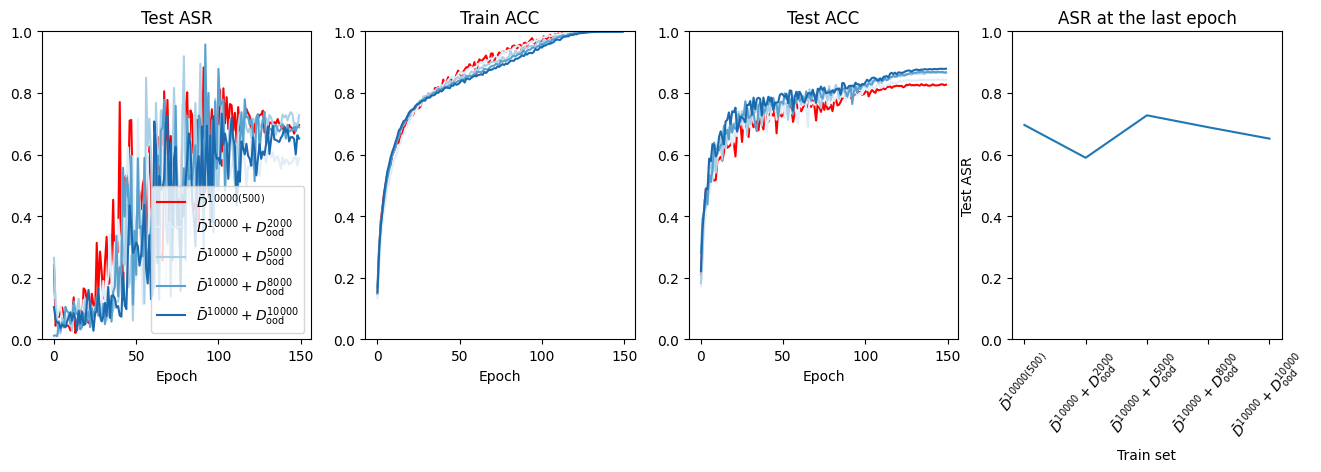

In [11]:
paths = {
        r"$\bar D^{10000(500)}$": "outputs/SIG/resnet18_sgd/resnet18_sgd_150_0.001_0.2.pt",
        r"$\bar D^{10000} + D_{\text{ood}}^{2000}$": "outputs/SIG-ood/cifar10_2_0.2/resnet18_sgd/resnet18_sgd_150_0.001_0.2_43.pt",
        r"$\bar D^{10000} + D_{\text{ood}}^{5000}$": "outputs/SIG-ood/cifar10_2_0.5/resnet18_sgd/resnet18_sgd_150_0.001_0.2_43.pt",
        r"$\bar D^{10000} + D_{\text{ood}}^{8000}$": "outputs/SIG-ood/cifar10_2_0.8/resnet18_sgd/resnet18_sgd_150_0.001_0.2_43.pt",
        r"$\bar D^{10000} + D_{\text{ood}}^{10000}$": "outputs/SIG-ood/cifar10_2_1.0/resnet18_sgd/resnet18_sgd_150_0.001_0.2_43.pt",
    }
fig = plot_ood(paths)
fig.savefig("figs/sigood_cifar10_2_asr.pdf", dpi=200, bbox_inches='tight')

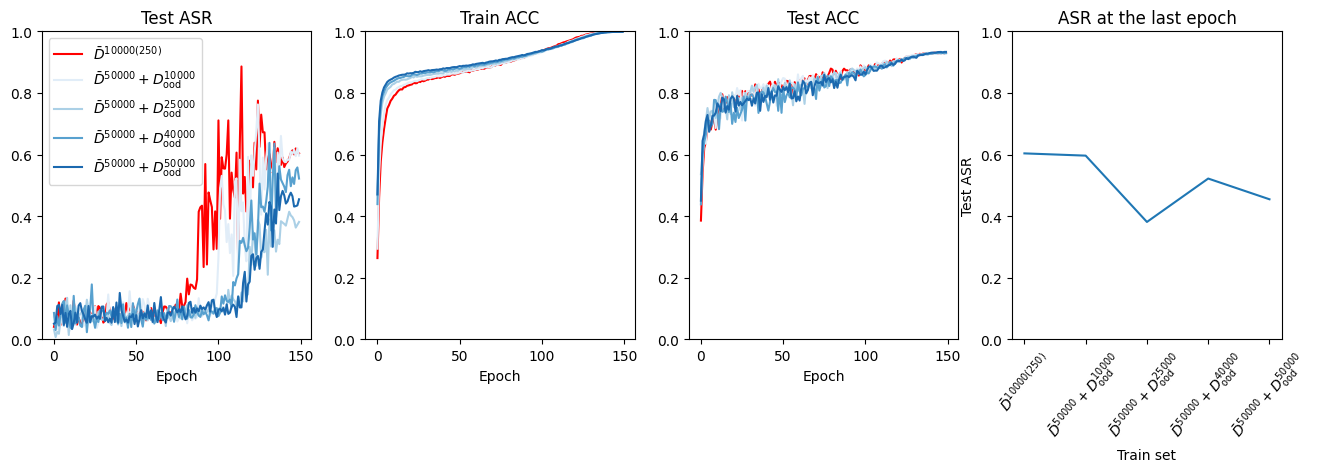

In [12]:
paths = {
    r"$\bar D^{10000(250)}$": "outputs/SIG/resnet18_sgd/resnet18_sgd_150_0.001_1.0.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{10000}$": "outputs/SIG-ood/cifake10_0.2/resnet18_sgd/resnet18_sgd_150_0.001_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{25000}$": "outputs/SIG-ood/cifake10_0.5/resnet18_sgd/resnet18_sgd_150_0.001_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{40000}$": "outputs/SIG-ood/cifake10_0.8/resnet18_sgd/resnet18_sgd_150_0.001_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{50000}$": "outputs/SIG-ood/cifake10_1.0/resnet18_sgd/resnet18_sgd_150_0.001_1.0_43.pt",
}
fig = plot_ood(paths)
fig.savefig("figs/sigood_cifake10_asr.pdf", dpi=200, bbox_inches='tight')

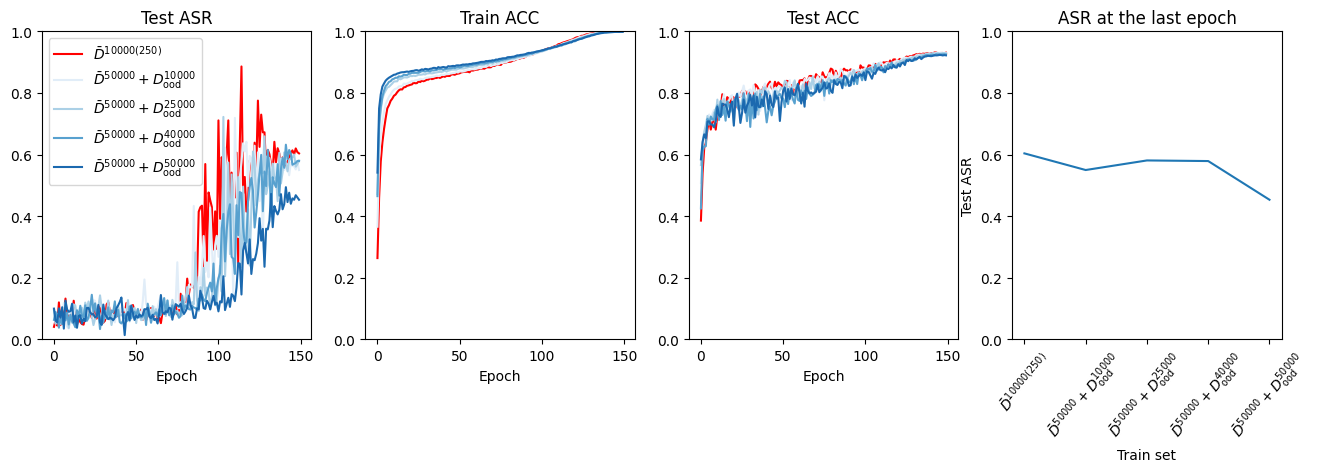

In [13]:
paths = {
    r"$\bar D^{10000(250)}$": "outputs/SIG/resnet18_sgd/resnet18_sgd_150_0.001_1.0.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{10000}$": "outputs/SIG-ood/fake-cifar10_0.2/resnet18_sgd/resnet18_sgd_150_0.001_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{25000}$": "outputs/SIG-ood/fake-cifar10_0.5/resnet18_sgd/resnet18_sgd_150_0.001_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{40000}$": "outputs/SIG-ood/fake-cifar10_0.8/resnet18_sgd/resnet18_sgd_150_0.001_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{50000}$": "outputs/SIG-ood/fake-cifar10_1.0/resnet18_sgd/resnet18_sgd_150_0.001_1.0_43.pt",
}
fig = plot_ood(paths)
fig.savefig("figs/sigood_fakecifar10_asr.pdf", dpi=200, bbox_inches='tight')

## WANET-OOD

In [10]:
# paths = {
#     r"$\bar D^{10000(250)}$": "outputs/WANET/resnet18_sgd/resnet18_sgd_150_0.05_1.0_43.pt",
#     r"$\bar D^{50000} + D_{\text{ood}}^{10000}$": "outputs/WANET-ood/cifar10_2_0.2/resnet18_sgd/resnet18_sgd_150_0.05_0.2_43.pt",
#     r"$\bar D^{50000} + D_{\text{ood}}^{25000}$": "outputs/WANET-ood/cifar10_2_0.5/resnet18_sgd/resnet18_sgd_150_0.05_0.2_43.pt",
#     r"$\bar D^{50000} + D_{\text{ood}}^{40000}$": "outputs/WANET-ood/cifar10_2_0.8/resnet18_sgd/resnet18_sgd_150_0.05_0.2_43.pt",
#     r"$\bar D^{50000} + D_{\text{ood}}^{50000}$": "outputs/WANET-ood/cifar10_2_1.0/resnet18_sgd/resnet18_sgd_150_0.05_0.2_43.pt",
# }
# fig = viz.plot_ood(paths)
# fig.savefig("figs/wanetood_cifake10_asr.pdf", dpi=200, bbox_inches='tight')

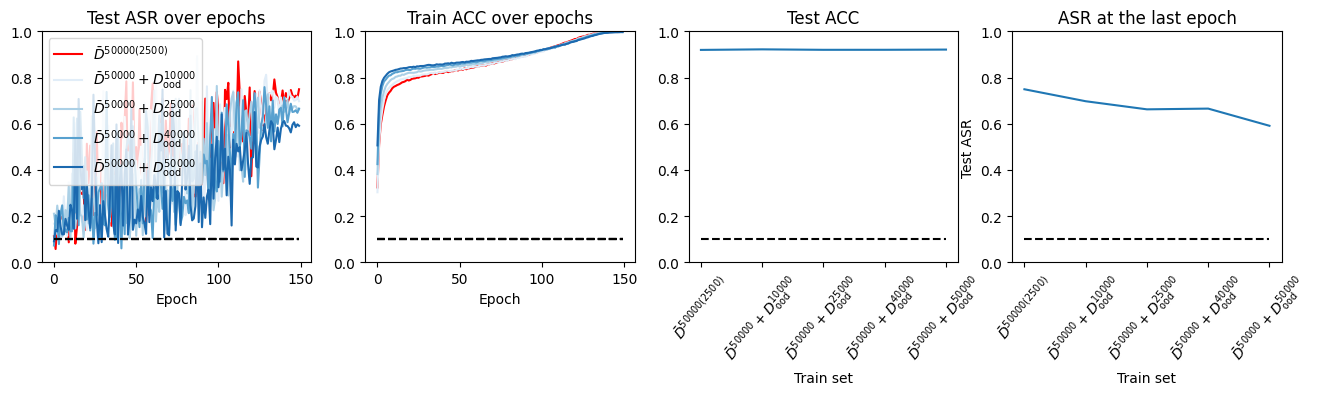

In [14]:
paths = {
    r"$\bar D^{50000(2500)}$": "outputs/WANET/resnet18_sgd/resnet18_sgd_150_0.05_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{10000}$": "outputs/WANET-ood/cifake10_0.2/resnet18_sgd/resnet18_sgd_150_0.05_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{25000}$": "outputs/WANET-ood/cifake10_0.5/resnet18_sgd/resnet18_sgd_150_0.05_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{40000}$": "outputs/WANET-ood/cifake10_0.8/resnet18_sgd/resnet18_sgd_150_0.05_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{50000}$": "outputs/WANET-ood/cifake10_1.0/resnet18_sgd/resnet18_sgd_150_0.05_1.0_43.pt",
}
fig = viz.plot_ood2(paths)
fig.savefig("figs/wanetood_cifake10_asr.pdf", dpi=200, bbox_inches='tight')

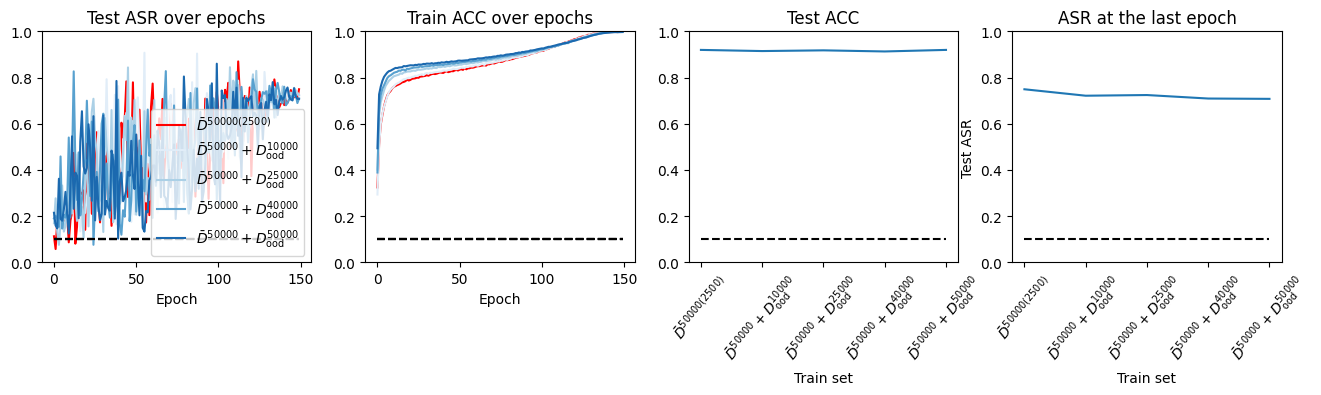

In [16]:
paths = {
    r"$\bar D^{50000(2500)}$": "outputs/WANET/resnet18_sgd/resnet18_sgd_150_0.05_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{10000}$": "outputs/WANET-ood/fake-cifar10_0.2/resnet18_sgd/resnet18_sgd_150_0.05_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{25000}$": "outputs/WANET-ood/fake-cifar10_0.5/resnet18_sgd/resnet18_sgd_150_0.05_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{40000}$": "outputs/WANET-ood/fake-cifar10_0.8/resnet18_sgd/resnet18_sgd_150_0.05_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{50000}$": "outputs/WANET-ood/fake-cifar10_1.0/resnet18_sgd/resnet18_sgd_150_0.05_1.0_43.pt",
}
fig = viz.plot_ood2(paths)
fig.savefig("figs/wanetood_fakecifar10_asr.pdf", dpi=200, bbox_inches='tight')

## SIG-OOD-SUB

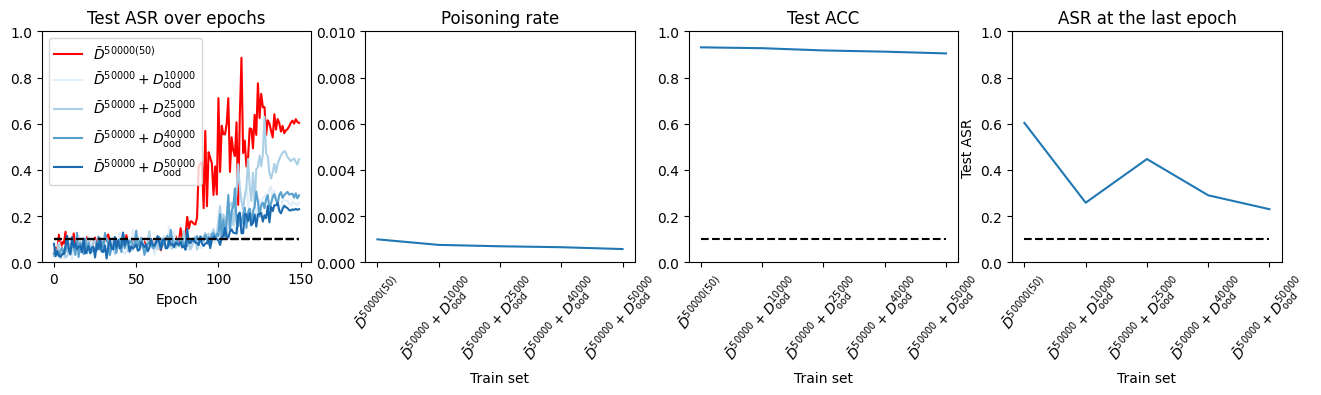

In [42]:
paths = {
    r"$\bar D^{50000(50)}$": "outputs/SIG/resnet18_sgd/resnet18_sgd_150_0.001_1.0.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{10000}$": "outputs/SIG-ood-sub/cifake10_0.2/resnet18_sgd/resnet18_sgd_150_0.001_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{25000}$": "outputs/SIG-ood-sub/cifake10_0.5/resnet18_sgd/resnet18_sgd_150_0.001_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{40000}$": "outputs/SIG-ood-sub/cifake10_0.8/resnet18_sgd/resnet18_sgd_150_0.001_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{50000}$": "outputs/SIG-ood-sub/cifake10_1.0/resnet18_sgd/resnet18_sgd_150_0.001_1.0_43.pt",
}
fig = viz.plot_ood3(paths)
# fig.savefig("figs/sigoodsub_cifake10_asr.pdf", dpi=200, bbox_inches='tight')

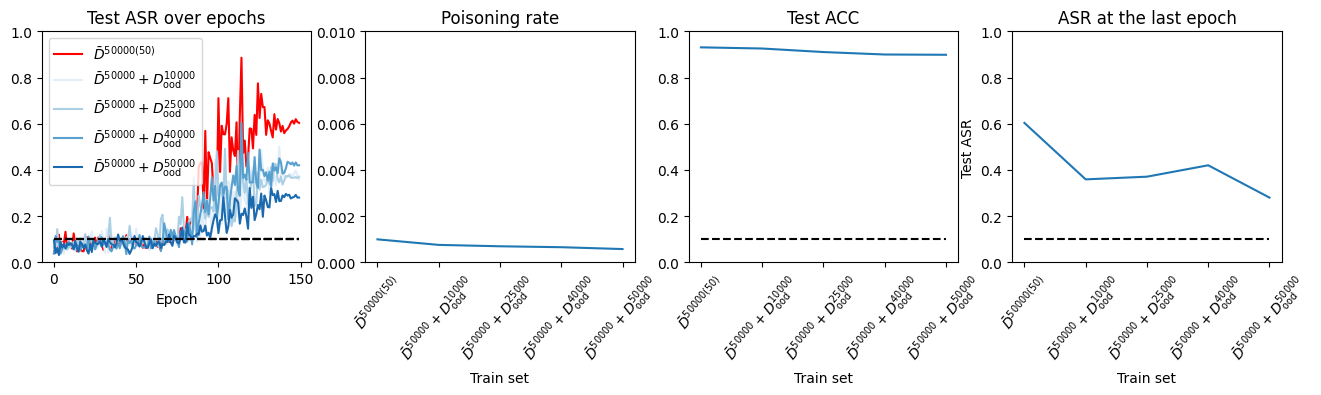

In [41]:
paths = {
    r"$\bar D^{50000(50)}$": "outputs/SIG/resnet18_sgd/resnet18_sgd_150_0.001_1.0.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{10000}$": "outputs/SIG-ood-sub/fake-cifar10_0.2/resnet18_sgd/resnet18_sgd_150_0.001_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{25000}$": "outputs/SIG-ood-sub/fake-cifar10_0.5/resnet18_sgd/resnet18_sgd_150_0.001_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{40000}$": "outputs/SIG-ood-sub/fake-cifar10_0.8/resnet18_sgd/resnet18_sgd_150_0.001_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{50000}$": "outputs/SIG-ood-sub/fake-cifar10_1.0/resnet18_sgd/resnet18_sgd_150_0.001_1.0_43.pt",
}
fig = viz.plot_ood3(paths)
# fig.savefig("figs/sigoodsub_fakecifar10_asr.pdf", dpi=200, bbox_inches='tight')

## BADNET-OOD-SUB

41639 50000
33398 50000
27877 50000
25093 50000


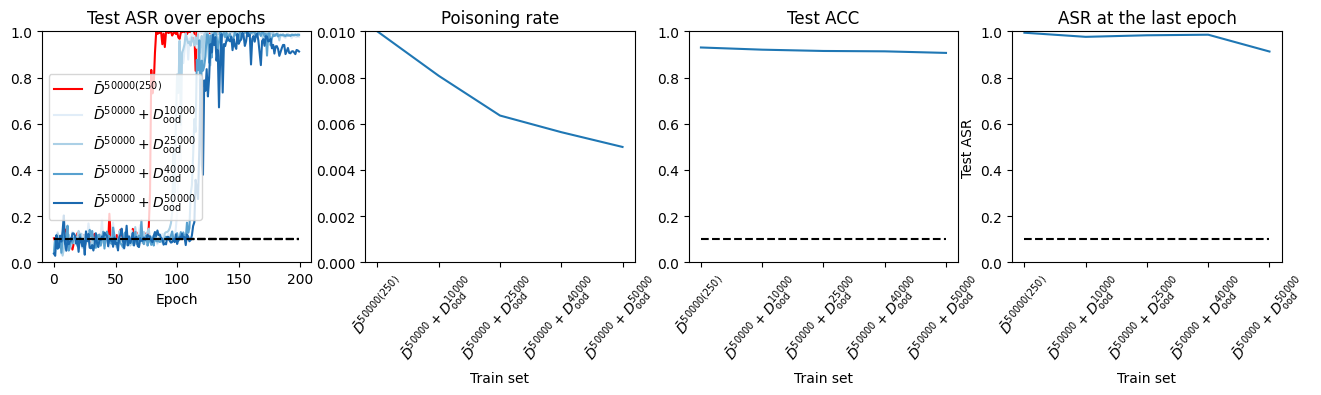

In [47]:
paths = {
    r"$\bar D^{50000(250)}$": "outputs/BADNET/resnet18_sgd/resnet18_sgd_150_0.01_1.0_90.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{10000}$": "outputs/BADNET-ood-sub/cifake10_0.2/resnet18_sgd/resnet18_sgd_200_0.01_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{25000}$": "outputs/BADNET-ood-sub/cifake10_0.5/resnet18_sgd/resnet18_sgd_200_0.01_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{40000}$": "outputs/BADNET-ood-sub/cifake10_0.8/resnet18_sgd/resnet18_sgd_200_0.01_1.0_43.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{50000}$": "outputs/BADNET-ood-sub/cifake10_1.0/resnet18_sgd/resnet18_sgd_200_0.01_1.0_43.pt",
}
fig = viz.plot_ood3(paths)
# fig.savefig("figs/badnetoodsub_cifake10_asr.pdf", dpi=200, bbox_inches='tight')

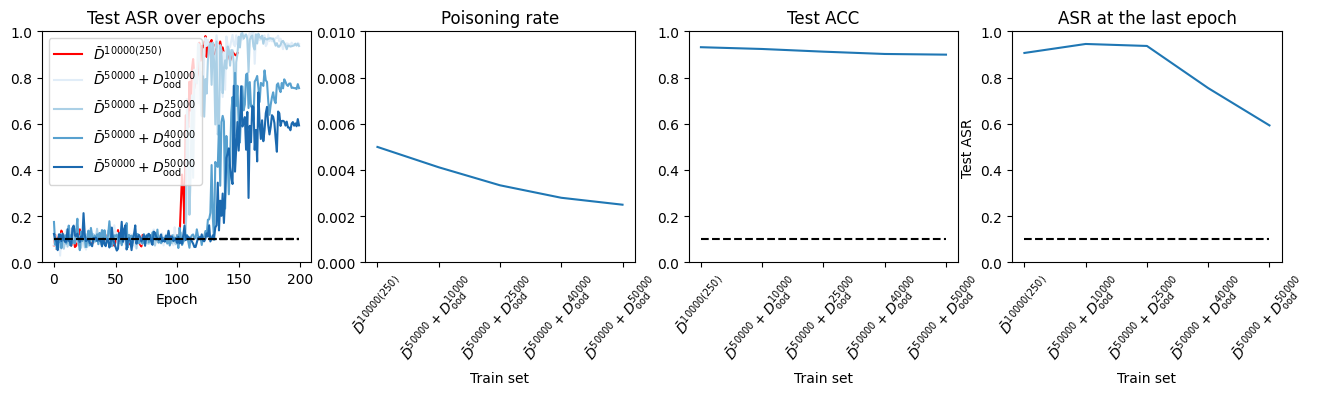

In [40]:
paths = {
    r"$\bar D^{10000(250)}$": "outputs/BADNET/resnet18_sgd/resnet18_sgd_150_0.005_1.0_90.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{10000}$": "outputs/BADNET-ood-sub/fake-cifar10_0.2/resnet18_sgd/resnet18_sgd_200_0.005_1.0_90.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{25000}$": "outputs/BADNET-ood-sub/fake-cifar10_0.5/resnet18_sgd/resnet18_sgd_200_0.005_1.0_90.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{40000}$": "outputs/BADNET-ood-sub/fake-cifar10_0.8/resnet18_sgd/resnet18_sgd_200_0.005_1.0_90.pt",
    r"$\bar D^{50000} + D_{\text{ood}}^{50000}$": "outputs/BADNET-ood-sub/fake-cifar10_1.0/resnet18_sgd/resnet18_sgd_200_0.005_1.0_90.pt",
}
fig = viz.plot_ood3(paths)
# fig.savefig("figs/badnetoodsub_fakecifar10_asr.pdf", dpi=200, bbox_inches='tight')